## Step 2
### Pseudocode that elaborates the steps in Sequential Portfolio Selection Problem

**Input:**
- $\delta$: Number of historical returns to consider
- $N$: Total number of trials
- Historical returns: $H_{i, t}$ for $i = 1$ to $K$, $t = 1$ to $\delta$
- K: Number of assets in the selected basket

**Procedure:**

1. **Select the $K$ assets with the highest average historical returns.**

2. **For** $t = 1$ **to** $N$ **do**:
   - **Choose portfolio weights:**
     - $\omega = (\omega_1, \omega_2, ..., \omega_K)$

   - **Observe the returns for the current trial:**
     - $R = (R_{1,t}, R_{2,t}, ..., R_{K,t})$, where $R_{i,t}$ is the return of asset $i$ at trial $t$

   - **Receive the reward:**
     - Reward = $\omega \cdot R$


## Step 3

### Data collection and preparation

In [1]:
# imports
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

In [2]:
financial_tickers = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW", "BBT", "STI"]
non_financial_tickers = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "HCP", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]
tickers = financial_tickers + non_financial_tickers

start_date = datetime.date(2008, 9, 1)
end_date = datetime.date(2008, 11, 1)

data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
# BBT, STI merged to form TFC: https://www.iclub.com/faq/Home/Article?id=660&category=27&parent=4
# HCP IPO'ed in 2021 December: https://www.bloomberg.com/news/articles/2021-12-09/software-firm-hashicorp-climbs-in-debut-after-1-2-billion-ipo

[*********************100%***********************]  30 of 30 completed

3 Failed downloads:
- HCP: Data doesn't exist for startDate = 1220241600, endDate = 1225512000
- BBT: No timezone found, symbol may be delisted
- STI: No timezone found, symbol may be delisted


In [3]:
prices = data.dropna(axis=1)
prices.head()

,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-02 00:00:00,85.585289,32.013863,25.949486,152.612274,8.293489,35.175720,16.607153,8.145223,26.487038,63.728550,...,4.405714,10.304309,50.371571,45.981956,20.580000,20.074360,21.815508,21.223225,42.890278,44.898087
2008-09-03 00:00:00,86.502785,32.234497,26.736319,156.605286,8.195989,35.755199,16.299484,8.091928,26.150997,63.098724,...,4.415714,10.320431,50.837982,47.205105,21.799999,20.099251,22.206392,21.087219,42.990959,45.304554
2008-09-04 00:00:00,88.555122,30.532541,24.821951,146.143539,8.208177,33.930637,15.579261,7.958692,26.410666,61.012478,...,4.267143,10.035547,49.898308,45.696922,20.379999,19.559628,21.330271,20.175997,42.983761,44.212879
2008-09-05 00:00:00,89.681877,31.044697,26.144161,152.292847,8.128958,35.011288,15.565274,7.825454,26.441221,61.004631,...,4.237143,9.949547,50.954586,46.753849,19.070000,19.999636,22.064857,21.216425,43.674026,43.910946
2008-09-08 00:00:00,88.345856,31.927206,28.172096,162.275284,8.378798,38.159241,16.341433,7.630041,27.296625,61.020374,...,4.307143,10.288182,52.662430,50.423393,18.900000,20.937771,22.873596,22.821243,44.580006,44.578709


In [4]:
log_returns = (np.log(prices) - np.log(prices.shift(1))).dropna()
log_returns.head()

,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-03 00:00:00,0.010663,0.006868,0.029871,0.025828,-0.011826,0.016340,-0.018700,-0.006564,-0.012768,-0.009932,...,0.002267,0.001563,0.009217,0.026253,0.057590,0.001239,0.017759,-0.006429,0.002345,0.009012
2008-09-04 00:00:00,0.023449,-0.054244,-0.074295,-0.069139,0.001486,-0.052377,-0.045193,-0.016602,0.009881,-0.033622,...,-0.034225,-0.027992,-0.018657,-0.032471,-0.067356,-0.027215,-0.040253,-0.044174,-0.000167,-0.024391
2008-09-05 00:00:00,0.012644,0.016635,0.051898,0.041216,-0.009698,0.031352,-0.000898,-0.016883,0.001156,-0.000129,...,-0.007055,-0.008607,0.020948,0.022866,-0.066438,0.022246,0.033859,0.050282,0.015931,-0.006853
2008-09-08 00:00:00,-0.015009,0.028031,0.074706,0.063489,0.030272,0.086097,0.048661,-0.025288,0.031839,0.000258,...,0.016386,0.033469,0.032968,0.075559,-0.008955,0.045841,0.035997,0.072916,0.020532,0.015093
2008-09-09 00:00:00,-0.087732,-0.057913,-0.065748,-0.073502,-0.024292,-0.068583,-0.017264,-0.042813,0.012789,-0.045261,...,-0.047895,-0.048163,-0.052542,-0.062186,-0.020311,-0.071063,-0.056985,-0.073878,-0.014132,-0.046799


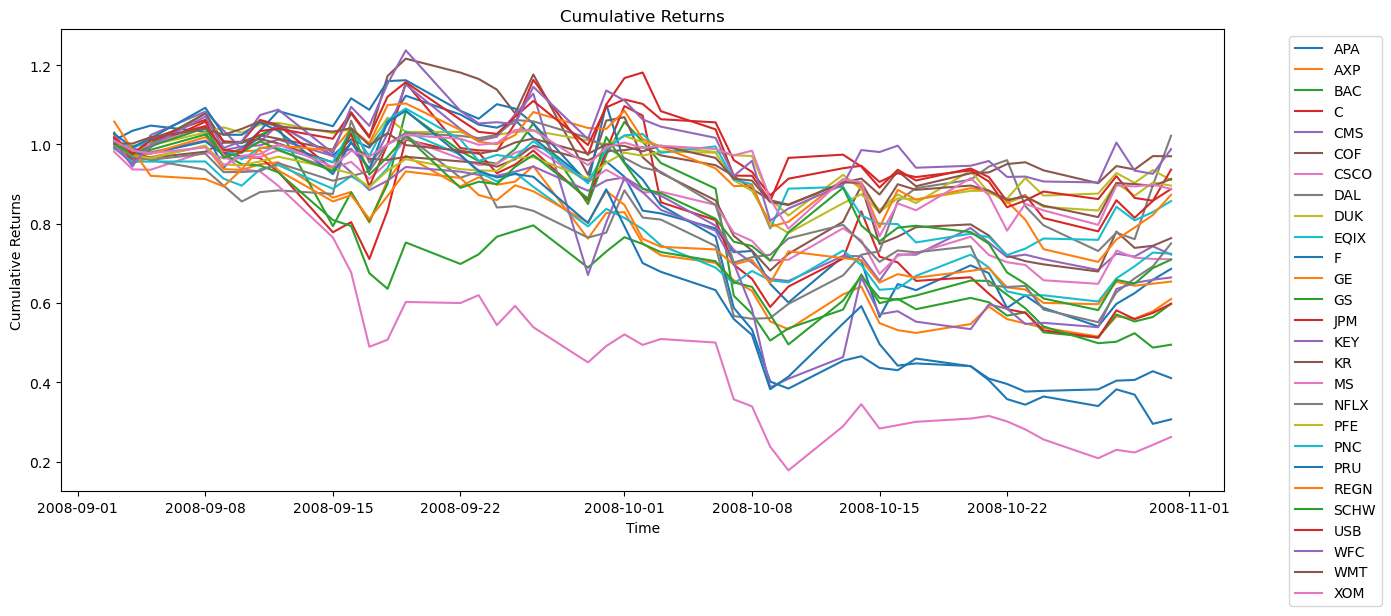

In [5]:
import matplotlib.dates as mdates

cumulative_returns = (1 + log_returns).cumprod()

plt.figure(figsize=(15, 6))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns[column], label=column)

plt.title('Cumulative Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Step 4
### Sorting the securities based on correlation matrix

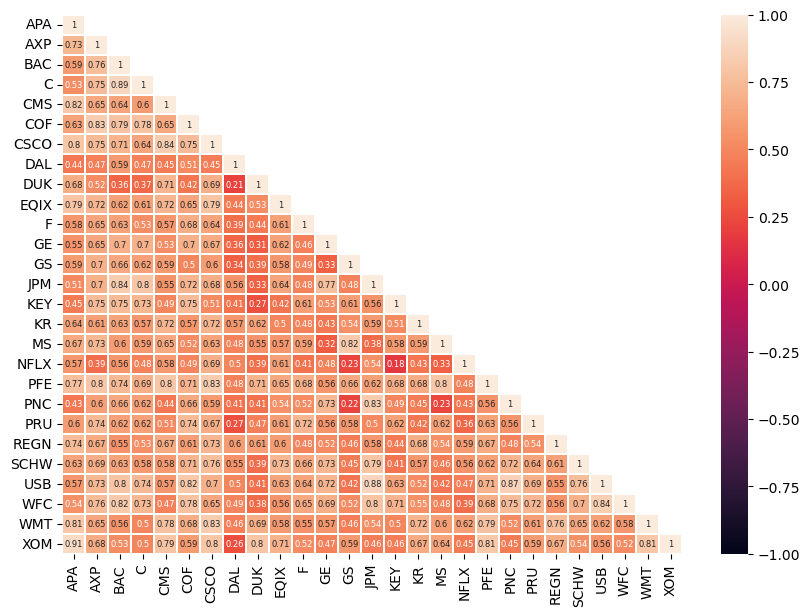

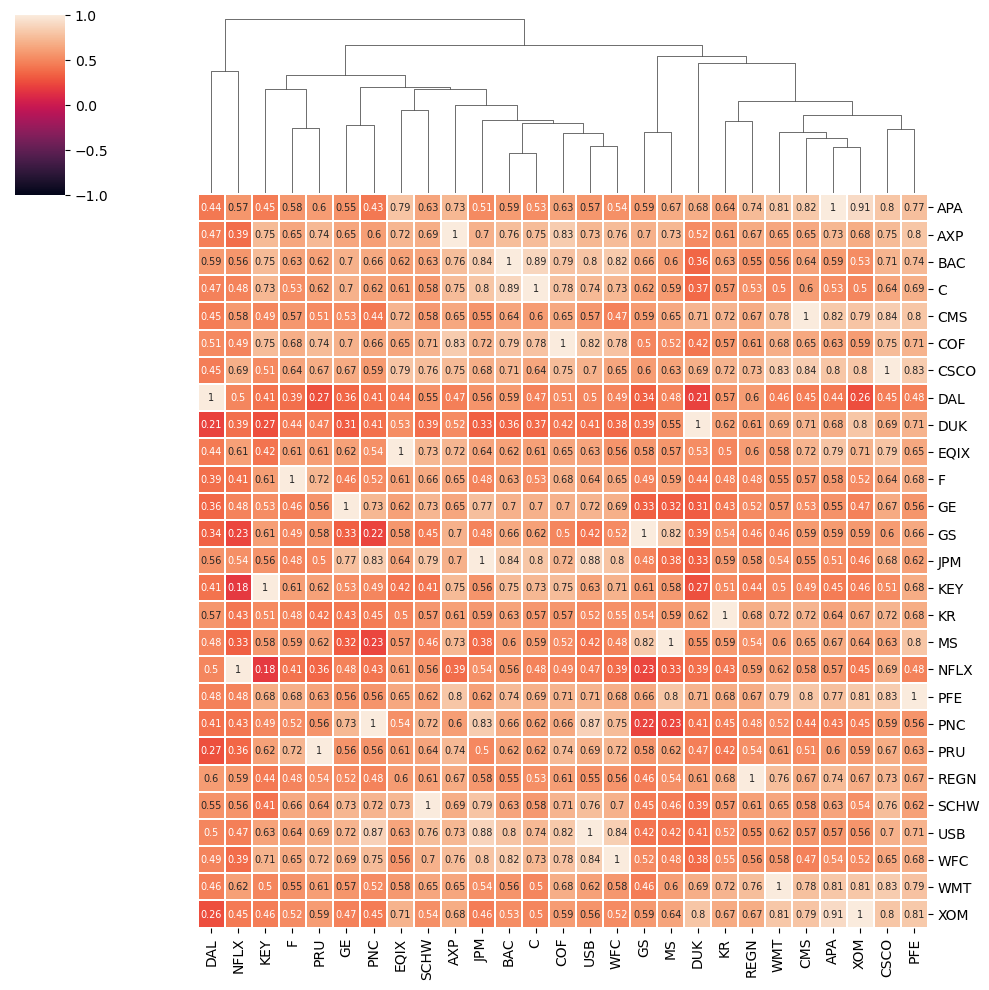

In [6]:
plt.figure(figsize=(10,7))

corr = log_returns.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, linewidths=0.2, mask=np.triu(corr, k=1))
for text in ax.texts:
    text.set_fontsize(6)

g = sns.clustermap(corr, row_cluster=False, vmin=-1, vmax=1, annot=True, linewidths=0.2)
ax = g.ax_heatmap
for text in ax.texts:
    text.set_fontsize(7)
    
plt.show()

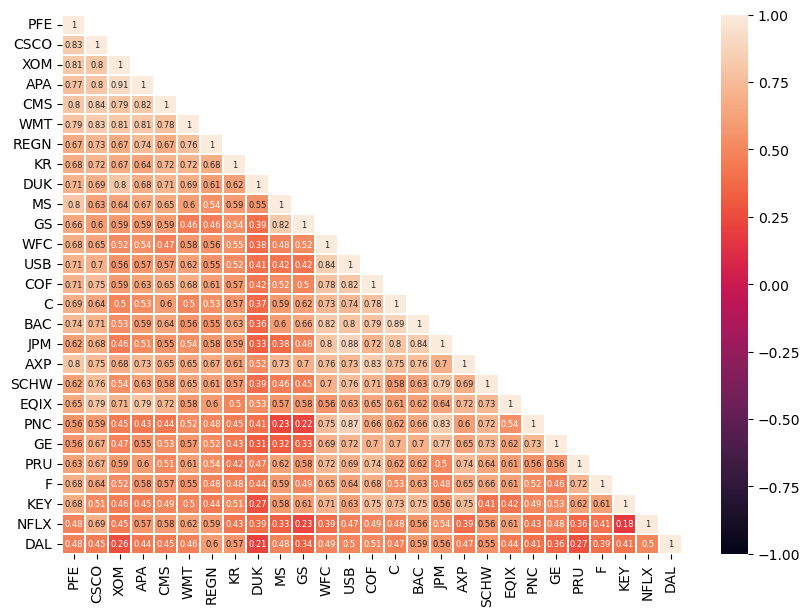

In [7]:
plt.figure(figsize=(10,7))

reordered_columns = log_returns.columns[g.dendrogram_col.reordered_ind[::-1]]

sorted_returns = log_returns.reindex(columns=reordered_columns)

ax = sns.heatmap(sorted_returns.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, mask=np.triu(corr, k=1))
for text in ax.texts:
    text.set_fontsize(6)

The process begins by computing the correlation matrix, which measures the statistical relationship between pairs of assets. Seaborn's heatmap function is then used to visualize the correlation matrix as a color-coded grid.

To further enhance the analysis, the assets can be sorted based on their correlation using Seaborn's clustermap function. The clustermap applies hierarchical clustering algorithms to group similar assets together based on their correlation patterns. By arranging the assets in clusters, it becomes easier to identify subsets of assets that exhibit similar behavior. The clustermap also generates a dendrogram that shows the hierarchical structure of the clusters. By analyzing the dendrogram, clusters with high intra-cluster correlation can be identified. By sorting the assets based on the dendrogram's reordered indices, the heatmap with the assets rearranged according to their correlation patterns is displayed.

This sorting process facilitates the identification of groups of assets with similar correlation profiles, allowing for better portfolio diversification and risk management.

## Step 6

### Pseudocode that describes UCB algorithm

**Input:**
- $K$: List of actions
- $N$: Number of trials
- $c$: Exploration parameter

**Procedure:**

1. **Initialize:**
   - Initialize action-value estimates: $Q[a] = 0$ for all $a \in K$
   - Initialize action counts: $N[a] = 0$ for all $a \in K$

2. **For** $t = 1$ **to** $N$ **do**:
   - $a_t = \arg\max_{a} \left(Q[a] + c \sqrt{\frac{\log(t)}{N[a]}}\right)$, for $a \in K$
   - **Observe the reward** $R_t$ **for taking action** $a_t$
   - **Update action counts:**
     - $N[a_t] = N[a_t] + 1$
   - **Update action-value estimate for** $a_t$ **using $\alpha$:**
     - $Q[a_t] = Q[a_t] + \alpha(R_t - Q[a_t])$

**Output:**
- Final action-value estimates: $Q$


### Python implementation

In [8]:
pdata = prices.to_numpy()
pdata_dates = pd.to_datetime(prices.index, format="%Y-%m-%d")

In [9]:
def update_qvalue(action, reward, qvalue_old, alpha):
    """Updates the Q-value based on the action and received reward."""
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new


def bandit_problem_ucb(pdata, ucb_weight, alpha, n_episodes, hold):
    t_max = pdata.shape[0] - hold
    n_assets = pdata.shape[1]

    reward_avg = np.zeros((t_max))
    optimal_avg = np.zeros((t_max))
    reward_queue = np.zeros((hold, 2))

    for run in range(n_episodes):
        # initialize Q-function and action records
        qvalue = np.zeros((n_assets))
        qvalue_ucb = np.zeros((n_assets))
        n_actions = np.zeros((n_assets))

        for t in range(t_max):
            action = np.argmax(qvalue)
            n_actions[action] += 1

            # compute reward as return over holding period
            reward_queue[hold - 1, 0] = (pdata[t + hold, action] - pdata[t, action]) / pdata[t, action]
            reward_queue[hold - 1, 1] = action

            qvalue = update_qvalue(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, alpha)

            qvalue_ucb = np.zeros((n_assets))
            for a in range(n_assets):
                if n_actions[a] == 0:
                    qvalue_ucb[a] = np.max(qvalue_ucb) + 1.0
                else:
                    qvalue_ucb[a] = qvalue[a] + ucb_weight * np.sqrt(np.log(t + 1) / n_actions[a])

            reward_queue[0:hold-1, :] = reward_queue[1:hold, :]
            reward_avg[t] += reward_queue[hold-1, 0] / n_episodes

            optimal_action = np.argmax((pdata[t + hold, :] - pdata[t, :]) / pdata[t, :])
            optimal_avg[t] += (action == optimal_action) / n_episodes

    return reward_avg, optimal_avg

The code implements a bandit problem with UCB (Upper Confidence Bound) action selection strategy. The `update_qvalue` function updates the Q-value based on the chosen action and received reward using the specified learning rate. The `bandit_problem_ucb` function performs the bandit problem using the UCB strategy.

- The `bandit_problem_ucb` function takes several parameters including historical data (`pdata`), UCB weight (`ucb_weight`), learning rate (`alpha`), number of episodes (`n_episodes`), and the holding period (`hold`).
- The function initializes arrays to store the average rewards (`reward_avg`), average frequency of optimal actions (`optimal_avg`), and a queue to store recent rewards and actions (`reward_queue`).
- The function then iterates over the specified number of episodes (`n_episodes`) to simulate the bandit problem.
- Within each episode, the Q-values, action counts, and action records are initialized.
- The function further iterates over the time steps (`t`) within each episode.
- It selects the action with the highest Q-value based on the current Q-values.
- The reward is computed as the return over the holding period based on the historical data.
- The Q-values are updated using the `update_qvalue` function.
- The UCB values for each action are calculated based on the action counts and Q-values.
- The reward queue is updated to track the recent rewards and actions.
- The average rewards and frequency of optimal actions are updated based on the current episode's results.
- After completing all episodes, the function returns the arrays of average rewards (`reward_avg`) and average frequency of optimal actions (`optimal_avg`).


In [10]:
# Parameters
np.random.seed(42)

NK = pdata.shape[1]
UCB_WEIGHT = 1  # UCB weight
ALPHA = 0.8
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

reward_avg, optimal_avg = bandit_problem_ucb(pdata, UCB_WEIGHT, ALPHA, NEPISODES, HOLD)


print("Average Reward:")
print(reward_avg)

print("Average Optimal Action:")
print(optimal_avg)

Average Reward:
[ 0.01072025  0.02372568  0.01272377 -0.01489734 -0.05626842 -0.00369035
 -0.00374744  0.01471629 -0.03988372  0.09709146 -0.05505683  0.04587172
  0.06535039 -0.04857933  0.01724155 -0.09265557  0.00672257  0.00333894
 -0.02329476  0.05706878 -0.02692196 -0.04395586 -0.02618488 -0.03124984
 -0.10636372 -0.15174352 -0.03215414 -0.22248946  0.0456977  -0.05354309
 -0.05020446 -0.00162593  0.01284834 -0.01507878 -0.00773194 -0.09233088
  0.02027765  0.02684796 -0.02139247  0.11774233 -0.06819477 -0.00490747
 -0.01239183]
Average Optimal Action:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


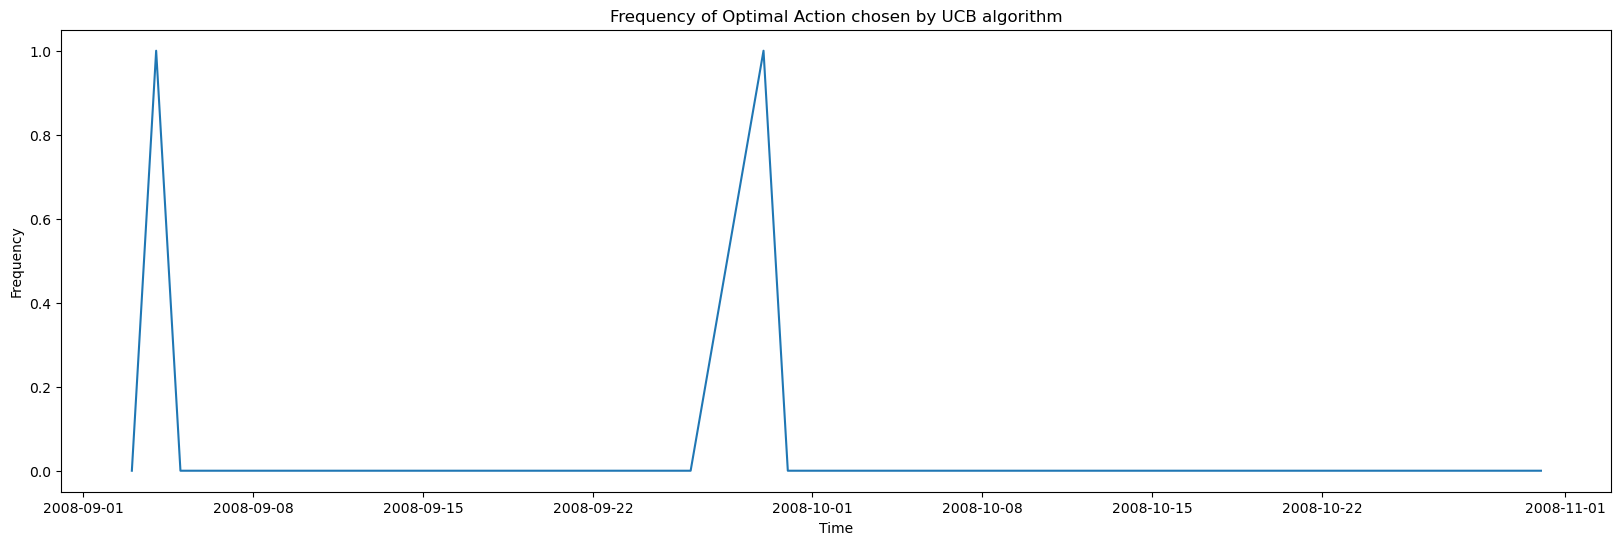

In [11]:
plt.figure(figsize=(20, 6))
plt.plot(pdata_dates[HOLD:pdata.shape[0]], optimal_avg)
plt.title("Frequency of Optimal Action chosen by UCB algorithm")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

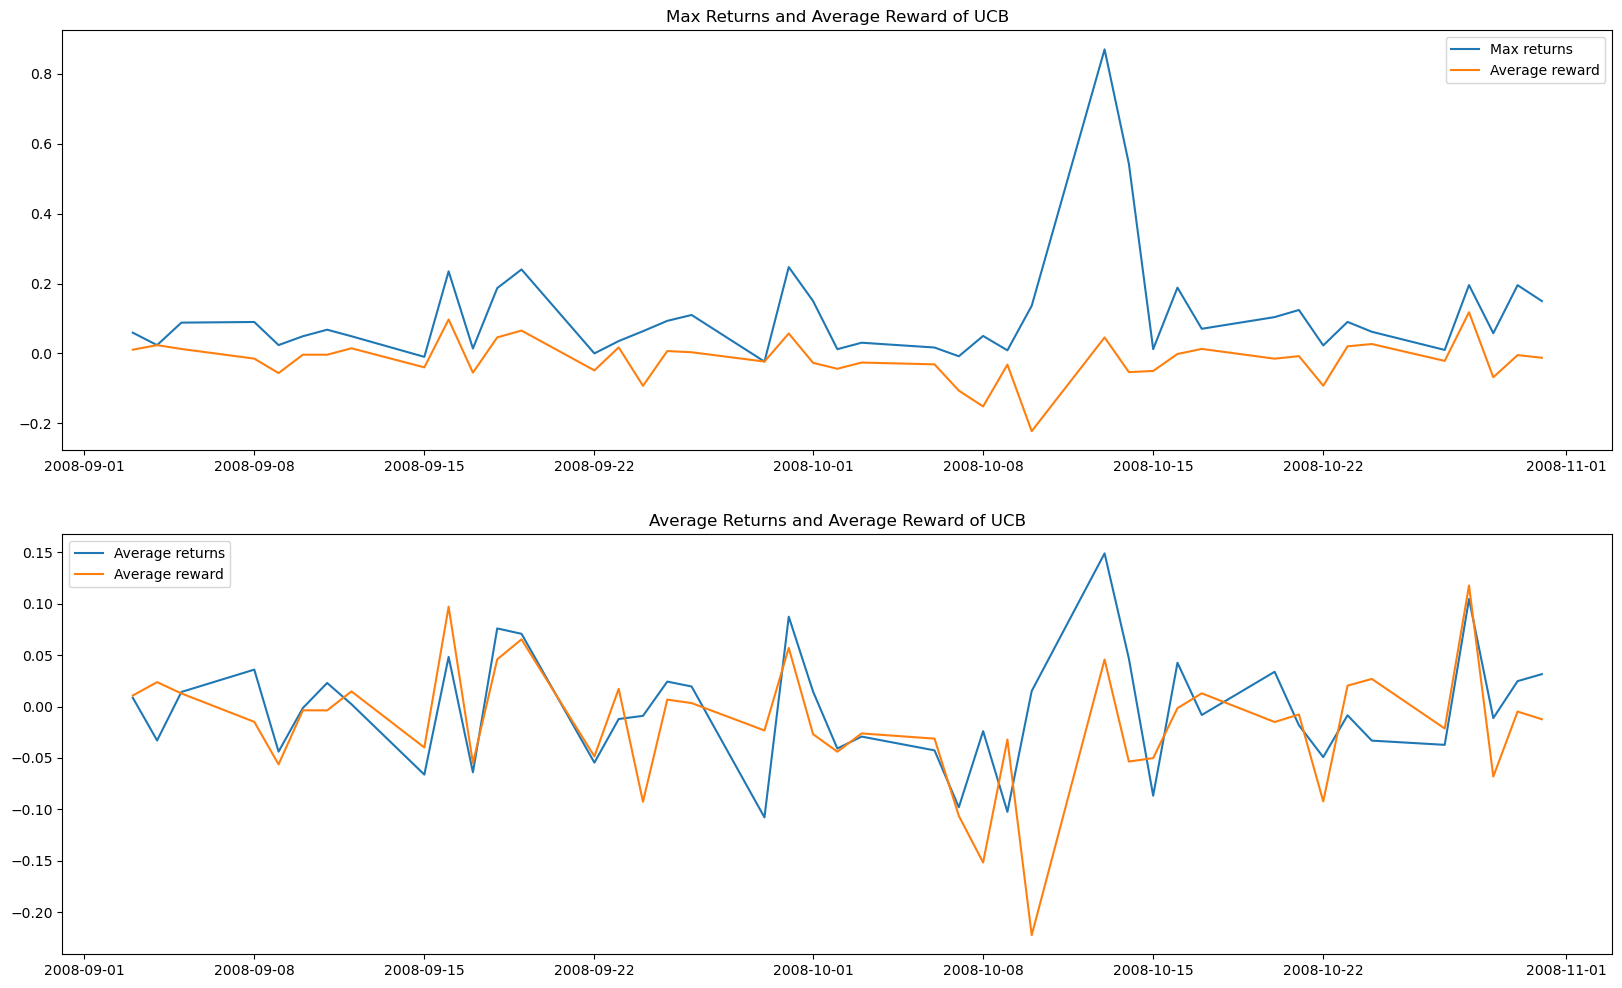

Average Frequency of Optimal Action: 4.65%
Average Annualized Return (Equally-Weighted Portfolio): -47.26%
Annualized Volatility (Equally-Weighted Portfolio): 122.11%
Average Annualized Return (UCB Portfolio): -98.60%
Annualized Volatility (UCB Portfolio): 94.49%


In [12]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 12))

# First plot
axs[0].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.max((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Max returns",
)
axs[0].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[0].legend()
axs[0].set_title("Max Returns and Average Reward of UCB")

# Second plot
axs[1].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Average returns",
)
axs[1].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[1].legend()
axs[1].set_title("Average Returns and Average Reward of UCB")

plt.show()

# average frequency of optimal action
optimal_avg_mean = np.mean(optimal_avg)
print("Average Frequency of Optimal Action: {:.2%}".format(optimal_avg_mean))

# average annualized return from holding the equally-weighted portfolio
equally_weighted_avg_return = np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
equally_weighted_annualized_return = (1 + equally_weighted_avg_return) ** (250 / HOLD) - 1
equally_weighted_annualized_volatility = np.sqrt(250 / HOLD) * np.std((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
print("Average Annualized Return (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_return))
print("Annualized Volatility (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_volatility))

# average annualized return from holding the Bandit portfolio
UCB_avg_return = np.mean(reward_avg)
UCB_annualized_return = (1 + UCB_avg_return) ** (250 / HOLD) - 1
UCB_annualized_volatility = np.sqrt(250 / HOLD) * np.std(reward_avg)
print("Average Annualized Return (UCB Portfolio): {:.2%}".format(UCB_annualized_return))
print("Annualized Volatility (UCB Portfolio): {:.2%}".format(UCB_annualized_volatility))

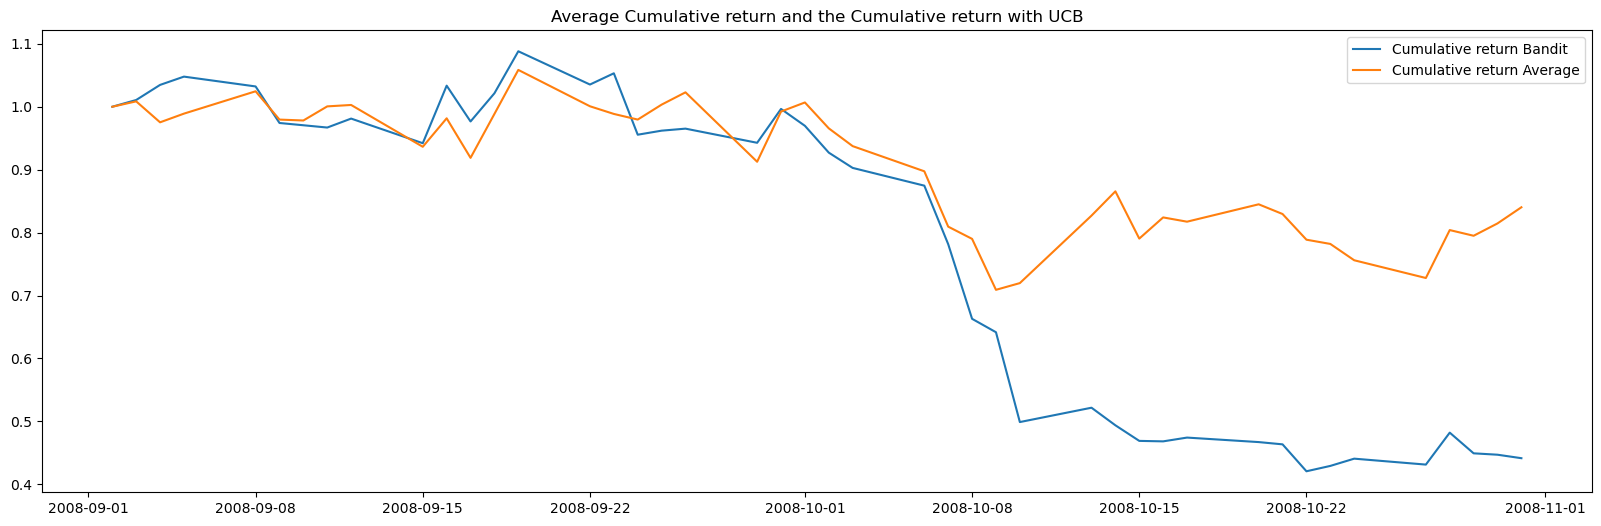

In [13]:
plt.figure(figsize=(20,6))

return_cumulative = np.zeros((TMAX+1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
legend = plt.legend()
plt.title("Average Cumulative return and the Cumulative return with UCB")
plt.show()

## Step 8
### Pseudocode that describes $\epsilon$-greedy algorithm

**Input:**
- $K$: List of actions
- $N$: Number of trials
- $\epsilon$: Exploration rate

**Procedure:**

1. **Initialize:**
   - Initialize action-value estimates: $Q[a] = 0$ for all $a \in K$
   - Initialize action counts: $N[a] = 0$ for all $a \in K$

2. **For** $t = 1$ **to** $N$ **do**:
   - **With probability** $\epsilon$:
     - Select a random action $a_t$ from $K$
   - **Otherwise**:
     - Select $a_t$ as the action with the maximum action-value estimate: $a_t = \arg\max_{a} Q[a]$, for $a \in K$
   - **Observe the reward** $R_t$ **for taking action** $a_t$
   - **Update action counts:**
     - $N[a_t] = N[a_t] + 1$
   - **Update action-value estimate for** $a_t$ **using $\alpha$:**
     - $Q[a_t] = Q[a_t] + \alpha(R_t - Q[a_t])$

**Output:**
- Final action-value estimates: $Q$


### Python implementation

In [14]:
def choose_action(qvalue, eps):
    """Chooses an action based on the Q-values using UCB or Epsilon Greedy strategy."""
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))
    if np.random.rand() <= eps:
        randnum = np.random.rand()
        for action in range(nactions):
            if randnum < (action + 1) / nactions:
                break
    elif action_hat[0].shape[0] > 1:
        randnum = np.random.rand()
        for action in range(action_hat[0].shape[0]):
            if randnum < (action + 1) / action_hat[0].shape[0]:
                break
        action = action_hat[0][action]
    else:
        action = np.argmax(qvalue)
        
    return action


def update_qvalue(action, reward, qvalue_old, alpha):
    """Updates the Q-value based on the action and received reward."""
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
    return qvalue_new


def bandit_problem_epsilon_greedy(pdata, epsilon, alpha, n_episodes, hold):
    t_max = pdata.shape[0] - hold
    n_assets = pdata.shape[1]

    reward_avg = np.zeros((t_max))
    optimal_avg = np.zeros((t_max))
    reward_queue = np.zeros((hold, 2))

    for run in range(n_episodes):
        # initialize Q-function and action records
        qvalue = np.zeros((n_assets))
        qvalue_ucb = np.zeros((n_assets))
        n_actions = np.zeros((n_assets))

        for t in range(t_max):
            action = choose_action(qvalue, epsilon)
            n_actions[action] += 1

            # compute reward as return over holding period
            reward_queue[hold - 1, 0] = (pdata[t + hold, action] - pdata[t, action]) / pdata[t, action]
            reward_queue[hold - 1, 1] = action

            qvalue = update_qvalue(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, alpha)

            reward_queue[0:hold-1, :] = reward_queue[1:hold, :]
            reward_avg[t] += reward_queue[hold-1, 0] / n_episodes

            optimal_action = np.argmax((pdata[t + hold, :] - pdata[t, :]) / pdata[t, :])
            optimal_avg[t] += (action == optimal_action) / n_episodes

    return reward_avg, optimal_avg

The code implements a bandit problem with Epsilon Greedy action selection strategy. It consists of three functions: `choose_action`, `update_qvalue`, and `bandit_problem_epsilon_greedy`. These functions work together to simulate the bandit problem using the Epsilon Greedy strategy.

Here's a breakdown of the code's functionality:

* The `choose_action` function takes the Q-values (`qvalue`) and the exploration parameter (`eps`) as input.
* It determines the number of available actions (`nactions`) based on the shape of the Q-values.
* It finds the action(`s`) with the highest Q-value (`action_hat`) by comparing it to the maximum value in the Q-values.
* If a randomly generated number is less than or equal to `eps`, it performs random exploration by selecting an action randomly based on the number of available actions.
* If there are multiple actions with the highest Q-value, it randomizes the action selection among those options.
* If none of the above conditions are met, it chooses the action with the highest Q-value.

`The update_qvalue` function updates the Q-value based on the chosen action and received reward using the specified learning rate.

- The `bandit_problem_epsilon_greedy` function takes several parameters including historical data (`pdata`), exploration rate (`eps`), learning rate (`alpha`), number of episodes (`n_episodes`), and the holding period (`hold`).
- The function initializes arrays to store the average rewards (`reward_avg`), average frequency of optimal actions (`optimal_avg`), and a queue to store recent rewards and actions (`reward_queue`).
- The function then iterates over the specified number of episodes (`n_episodes`) to simulate the bandit problem.
- Within each episode, the Q-values, action counts, and action records are initialized.
- The function further iterates over the time steps (`t`) within each episode.
- It uses `choose_action` function based on the Q-values and exploration rate.
- The reward is computed as the return over the holding period based on the historical data.
- The Q-values are updated using the `update_qvalue` function.
- The reward queue is updated to track the recent rewards and actions.
- The average rewards and frequency of optimal actions are updated based on the current episode's results.
- After completing all episodes, the function returns the arrays of average rewards (`reward_avg`) and average frequency of optimal actions (`optimal_avg`).

In [15]:
# Parameters
np.random.seed(42)
NK = pdata.shape[1]
EPSILON = 0.1
ALPHA = 0.8
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

reward_avg, optimal_avg = bandit_problem_epsilon_greedy(pdata, EPSILON, ALPHA, NEPISODES, HOLD)


print("Average Reward:")
print(reward_avg)

print("Average Optimal Action:")
print(optimal_avg)

Average Reward:
[ 0.0087782  -0.03642962  0.01388171  0.04037566 -0.04564549 -0.00204658
  0.02295171  0.00660803 -0.05814727  0.04711984 -0.05417792  0.07635583
  0.06964297 -0.05990219 -0.01254454 -0.01489213  0.02350377  0.01471273
 -0.10669594  0.08801098  0.01842552 -0.03452336 -0.03811551 -0.04015749
 -0.09752692 -0.02505316 -0.09722665  0.01790151  0.11922193  0.04675504
 -0.08599997  0.05328997 -0.0071847   0.03664614 -0.01550827 -0.03733393
 -0.0265607  -0.03226451 -0.03518246  0.10193187 -0.01204655  0.02742428
  0.0252516 ]
Average Optimal Action:
[0.031 0.035 0.041 0.056 0.013 0.027 0.051 0.065 0.026 0.036 0.038 0.042
 0.05  0.006 0.019 0.045 0.035 0.039 0.065 0.032 0.047 0.045 0.033 0.025
 0.038 0.029 0.07  0.031 0.019 0.034 0.091 0.123 0.006 0.049 0.01  0.045
 0.019 0.027 0.05  0.028 0.039 0.026 0.03 ]


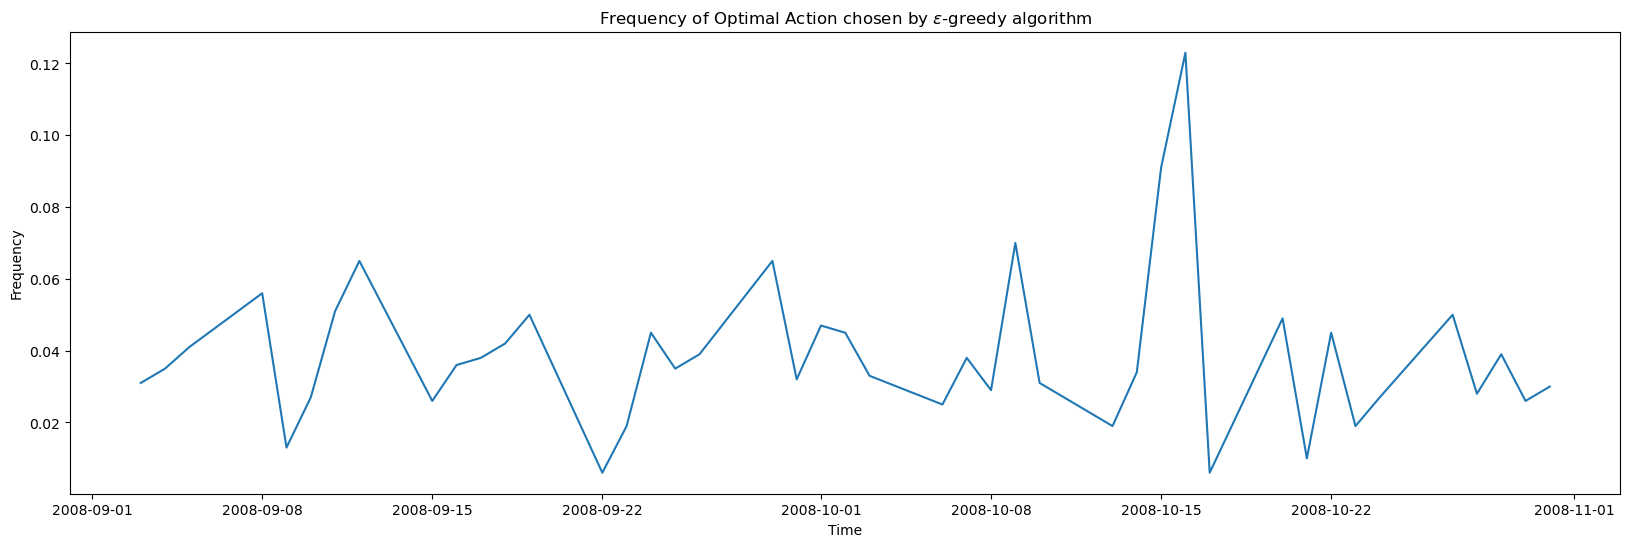

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(pdata_dates[HOLD:pdata.shape[0]], optimal_avg)
plt.title("Frequency of Optimal Action chosen by $\epsilon$-greedy algorithm")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

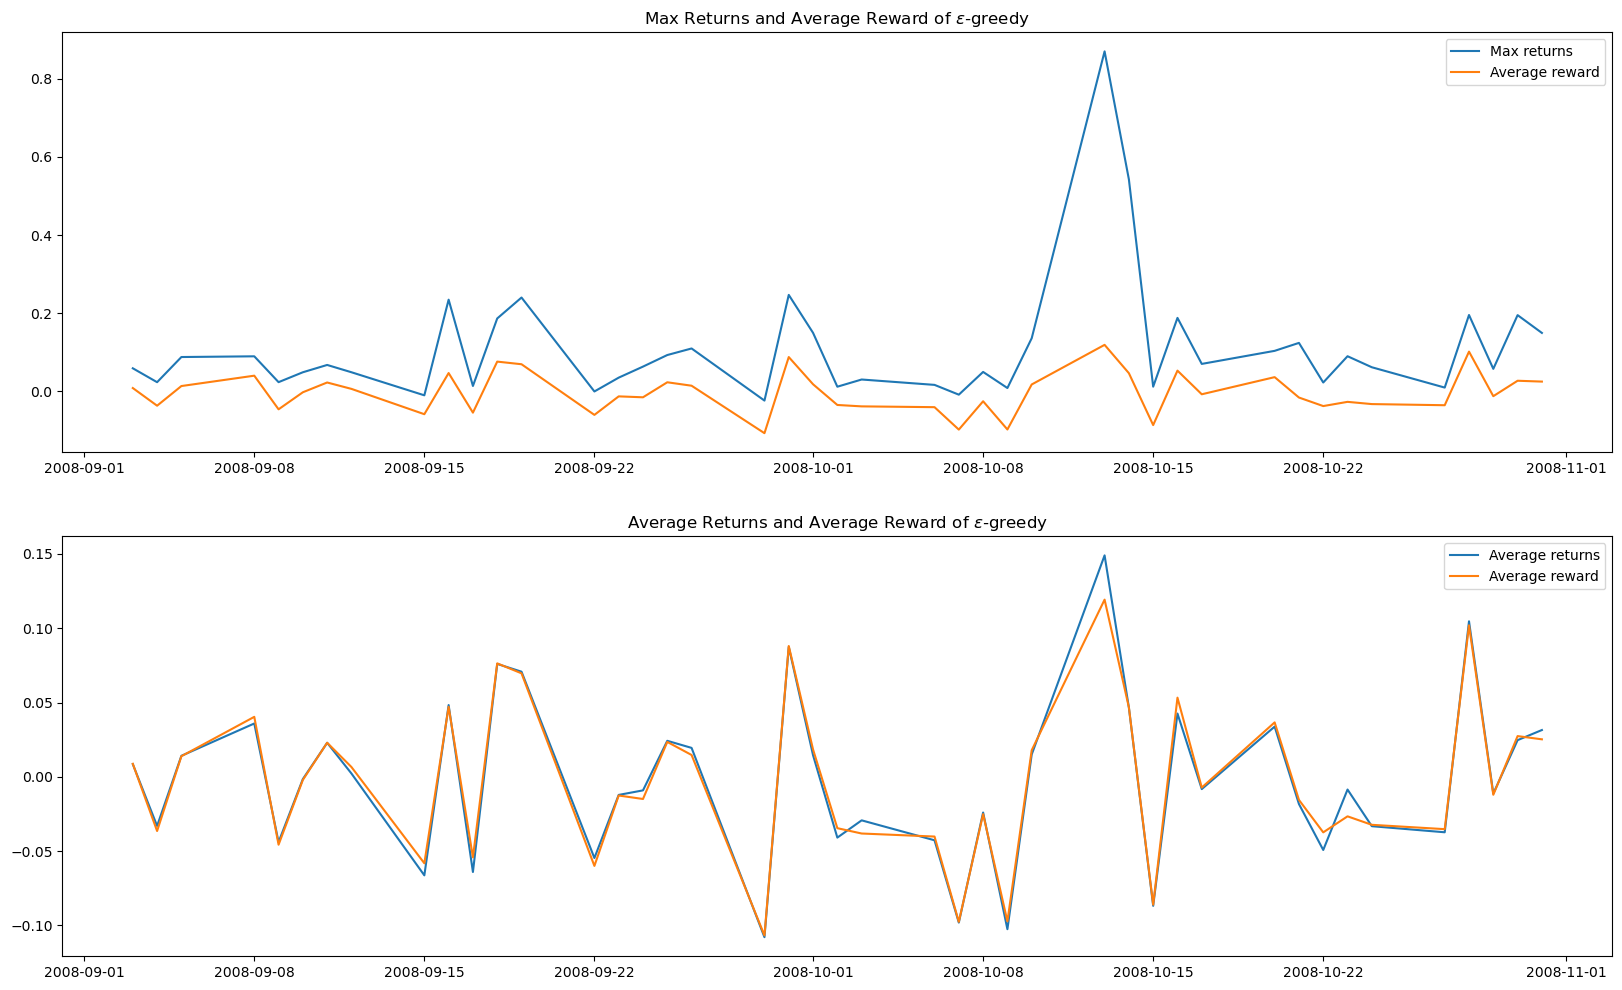

Average Frequency of Optimal Action: 3.87%
Average Annualized Return (Equally-Weighted Portfolio): -47.26%
Annualized Volatility (Equally-Weighted Portfolio): 122.11%
Average Annualized Return (e-greedy Portfolio): -49.21%
Annualized Volatility (e-greedy Portfolio): 82.74%


In [17]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 12))

# First plot
axs[0].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.max((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Max returns",
)
axs[0].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[0].legend()
axs[0].set_title("Max Returns and Average Reward of $\epsilon$-greedy")

# Second plot
axs[1].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Average returns",
)
axs[1].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[1].legend()
axs[1].set_title("Average Returns and Average Reward of $\epsilon$-greedy")

plt.show()

# average frequency of optimal action
optimal_avg_mean = np.mean(optimal_avg)
print("Average Frequency of Optimal Action: {:.2%}".format(optimal_avg_mean))

# average annualized return from holding the equally-weighted portfolio
equally_weighted_avg_return = np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
equally_weighted_annualized_return = (1 + equally_weighted_avg_return) ** (250 / HOLD) - 1
equally_weighted_annualized_volatility = np.sqrt(250 / HOLD) * np.std((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
print("Average Annualized Return (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_return))
print("Annualized Volatility (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_volatility))

# average annualized return from holding the Bandit portfolio
egreedy_avg_return = np.mean(reward_avg)
egreedy_annualized_return = (1 + egreedy_avg_return) ** (250 / HOLD) - 1
egreedy_annualized_volatility = np.sqrt(250 / HOLD) * np.std(reward_avg)
print("Average Annualized Return (e-greedy Portfolio): {:.2%}".format(egreedy_annualized_return))
print("Annualized Volatility (e-greedy Portfolio): {:.2%}".format(egreedy_annualized_volatility))

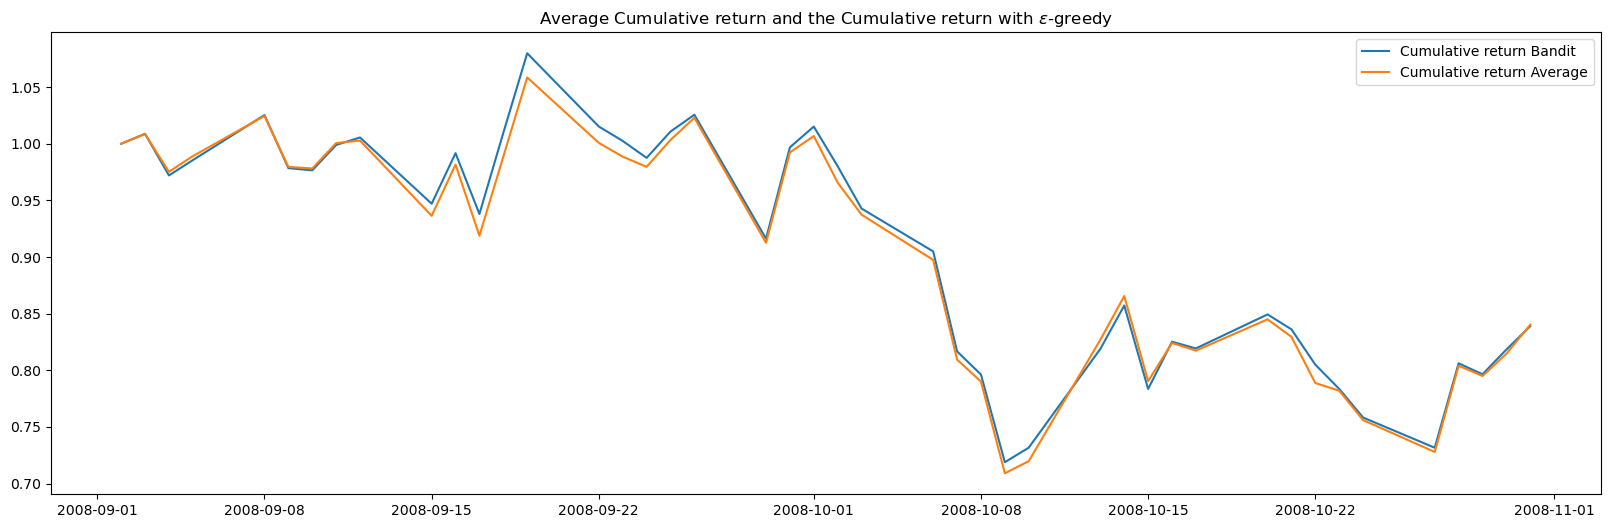

In [18]:
plt.figure(figsize=(20,6))

return_cumulative = np.zeros((TMAX+1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
legend = plt.legend()
plt.title("Average Cumulative return and the Cumulative return with $\epsilon$-greedy")
plt.show()

## Step 9

### Comparision of both the algorithms

**Average Reward:**

* Epsilon-Greedy: The average reward values obtained with the epsilon-greedy algorithm range from -0.1067 to 0.1192. The algorithm explores different actions based on the certain exploration rate (epsilon=0.1) and exploits the current best action.

* UCB: The average reward values obtained with the UCB algorithm range from -0.2225 to 0.1177. UCB balances exploration and exploitation by assigning higher confidence bounds to actions with potentially higher rewards.

**Average Optimal Action:**

* Epsilon-Greedy: The average frequency of selecting the optimal action is 3.87%. This means that, on average, the epsilon-greedy algorithm chooses the best action less frequently compared to other actions. It explores a wide range of actions but may not prioritize the optimal action consistently.

* UCB: The average frequency of selecting the optimal action is 4.65%. UCB algorithm focuses on balancing exploration and exploitation, and it seems to perform slightly better in terms of selecting the optimal action compared to epsilon-greedy. However, both algorithms have relatively low average frequencies of selecting the optimal action.

**Average Annualized Return:**

* Epsilon-Greedy: The average annualized return obtained with the epsilon-greedy algorithm is -49.21%. This indicates that, on average, the portfolio's return is negative during the Great Recession period. The algorithm explores different actions but does not achieve significantly positive returns.

* UCB: The average annualized return obtained with the UCB algorithm is -98.60%. This suggests that the UCB algorithm performs worse than epsilon-greedy in terms of achieving positive returns during the specified period. The UCB algorithm may not have effectively adapted to the stock picking problem during the recession.

**Annualized Volatility:**

* Epsilon-Greedy: The annualized volatility of the equally-weighted portfolio with the epsilon-greedy algorithm is 82.74%. This indicates the level of risk or fluctuations in the portfolio's returns. The epsilon-greedy algorithm seems to result in lower volatility compared to UCB.

* UCB: The annualized volatility of the equally-weighted portfolio with the UCB algorithm is 94.49%. This suggests that the UCB algorithm leads to slightly higher volatility compared to epsilon-greedy.

It is important to note that both algorithms demonstrated suboptimal performance, with negative annualized returns and high volatilities. However, it is essential to interpret these findings within the context of the constrained time frame and relatively large number of stocks and the period of high uncertainty (Great recession).

## Step 10
### Data collection at a different time-frame (recent)

We have chosen the time-frame from March 2021 to April 2022 to study the performance of both the algorithms. The stocks remain the same.

In [19]:
financial_tickers = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW", "BBT", "STI"]
non_financial_tickers = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "HCP", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]
tickers = financial_tickers + non_financial_tickers

start_date = datetime.date(2021, 3, 1)
end_date = datetime.date(2022, 5, 1)

data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
# BBT, STI merged to form TFC: https://www.iclub.com/faq/Home/Article?id=660&category=27&parent=4
# HCP IPO'ed in 2021 December: https://www.bloomberg.com/news/articles/2021-12-09/software-firm-hashicorp-climbs-in-debut-after-1-2-billion-ipo

prices = data.dropna(axis=1)
prices.head()

[*********************100%***********************]  30 of 30 completed

2 Failed downloads:
- BBT: No timezone found, symbol may be delisted
- STI: No timezone found, symbol may be delisted


,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-01 00:00:00,18.877598,134.861832,34.093887,64.083099,51.337032,118.330009,42.936783,48.060001,79.761543,626.406616,...,550.640015,31.117752,160.789413,80.979538,463.049988,62.408905,46.999393,35.361019,126.312805,51.132763
2021-03-02 00:00:00,18.858255,135.386871,33.846207,63.502537,51.393215,117.881248,42.562767,48.230000,79.944817,618.473389,...,547.820007,30.951500,160.807983,81.345039,454.859985,62.116821,46.530872,35.408691,125.101326,50.833576
2021-03-03 00:00:00,19.254763,138.634171,34.694031,64.857178,50.456749,119.743141,42.198105,48.349998,79.972305,590.731262,...,520.700012,31.764305,161.049545,81.664879,446.730011,63.246220,46.999393,35.933056,122.678337,51.241554
2021-03-04 00:00:00,20.289549,138.721664,34.942932,64.331902,50.484844,120.249184,41.665134,46.959999,79.230034,583.223267,...,511.290009,31.588818,160.334167,80.933853,449.380005,63.061234,46.870773,35.427761,122.620659,53.227024
2021-03-05 00:00:00,22.484842,143.242706,35.354595,64.718964,51.852085,121.929657,43.245346,46.209999,81.126938,589.977539,...,516.390015,31.764305,163.938873,82.843666,461.570007,63.304626,48.202854,35.685169,124.149429,55.239697


## Step 11

### UCB and $\epsilon$-greedy algorithms on recent dataset

In [20]:
pdata = prices.to_numpy()
pdata_dates = pd.to_datetime(prices.index, format="%Y-%m-%d")

In [21]:
np.random.seed(42)

# Parameters
NK = pdata.shape[1]
UCB_WEIGHT = 1  # UCB weight
ALPHA = 0.8
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

reward_avg, optimal_avg = bandit_problem_ucb(pdata, UCB_WEIGHT, ALPHA, NEPISODES, HOLD)

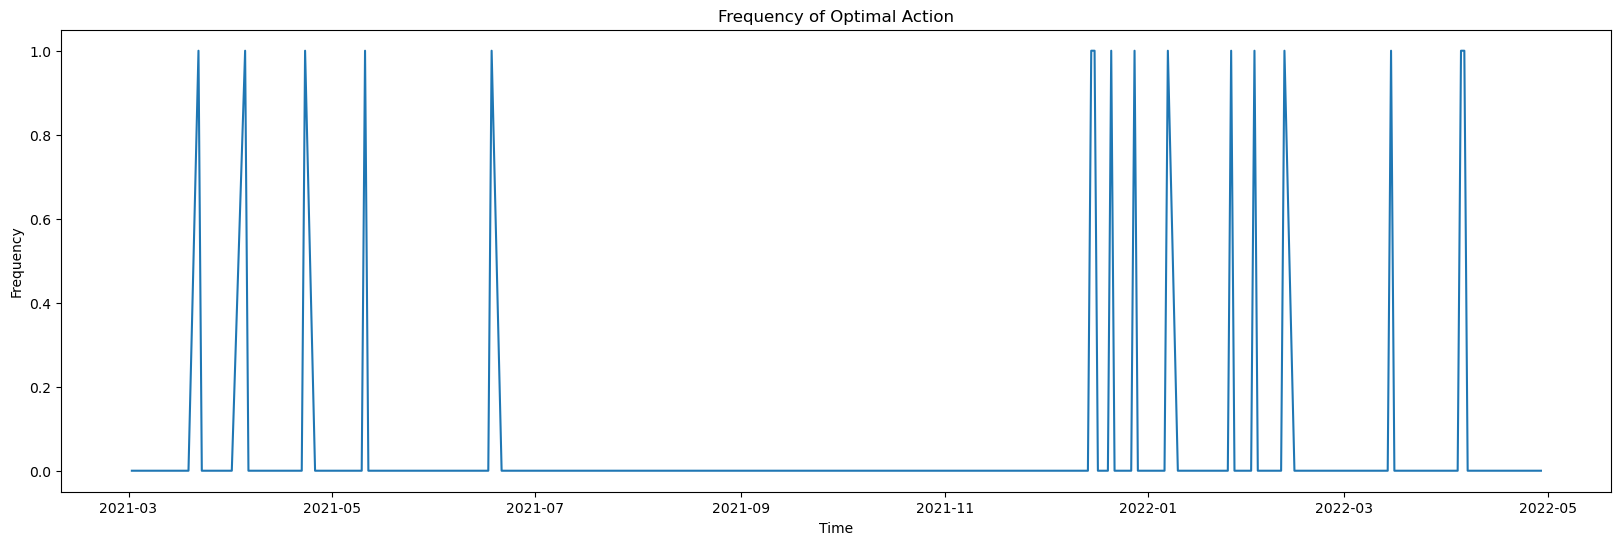

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(pdata_dates[HOLD:pdata.shape[0]], optimal_avg)
plt.title("Frequency of Optimal Action")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

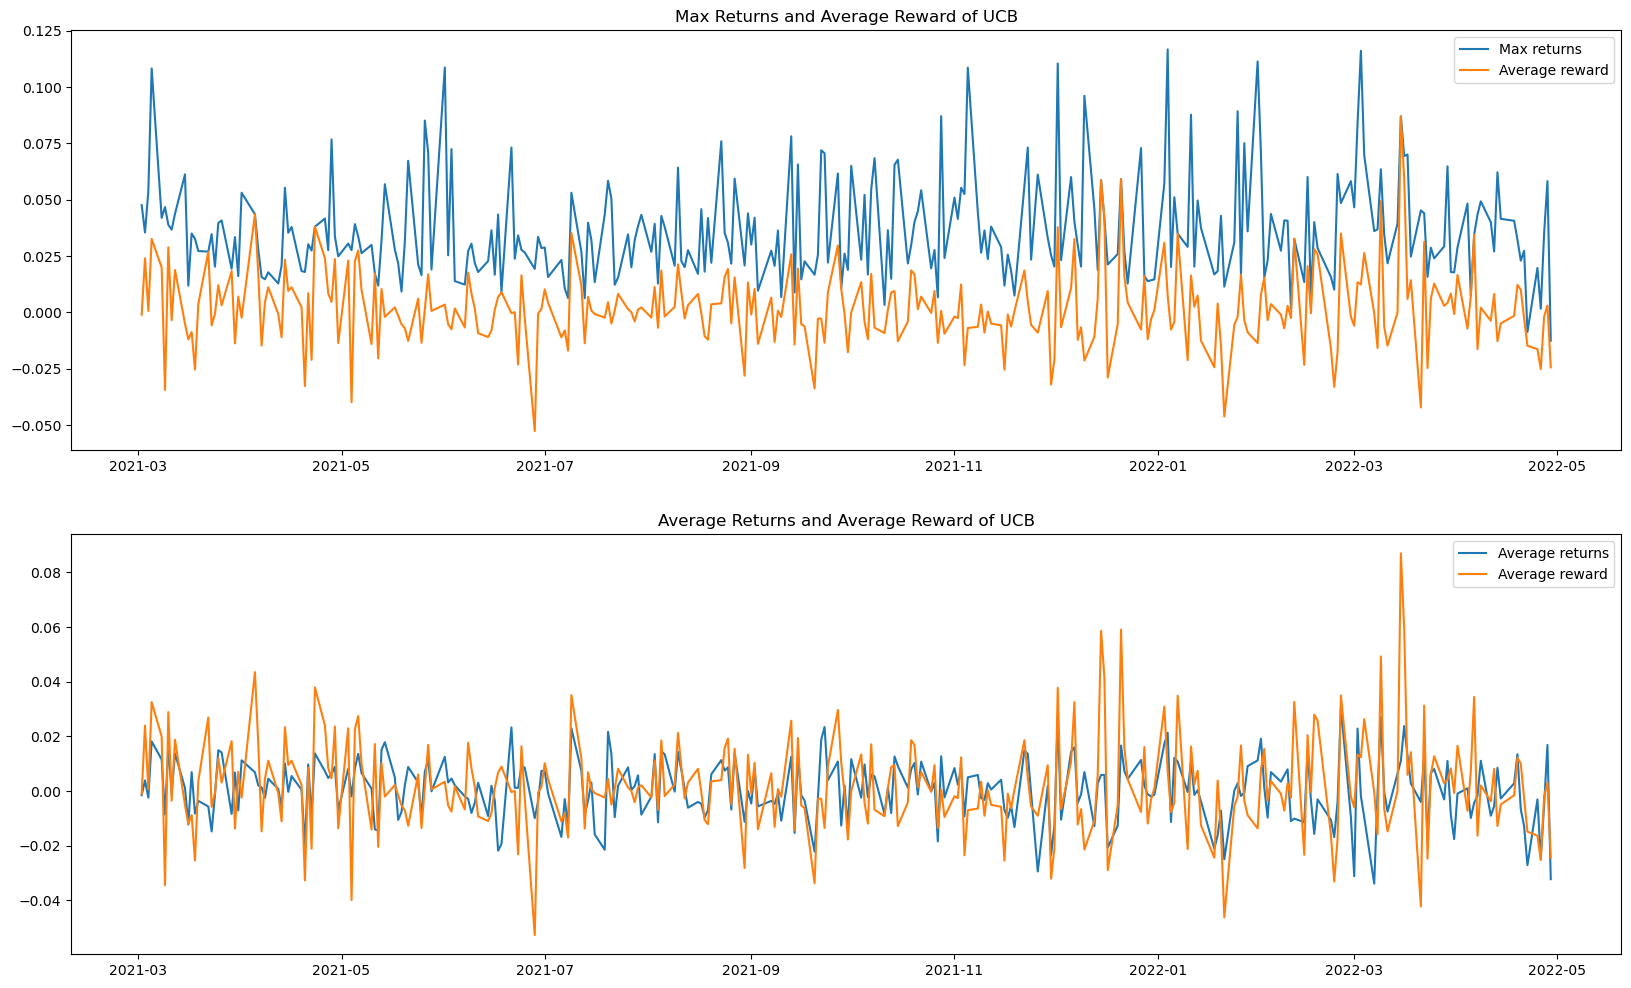

Average Frequency of Optimal Action: 5.42%
Average Annualized Return (Equally-Weighted Portfolio): 12.71%
Annualized Volatility (Equally-Weighted Portfolio): 31.10%
Average Annualized Return (UCB Portfolio): 61.45%
Annualized Volatility (UCB Portfolio): 27.59%


In [23]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 12))

# First plot
axs[0].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.max((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Max returns",
)
axs[0].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[0].legend()
axs[0].set_title("Max Returns and Average Reward of UCB")

# Second plot
axs[1].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Average returns",
)
axs[1].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[1].legend()
axs[1].set_title("Average Returns and Average Reward of UCB")

plt.show()

# average frequency of optimal action
optimal_avg_mean = np.mean(optimal_avg)
print("Average Frequency of Optimal Action: {:.2%}".format(optimal_avg_mean))

# average annualized return from holding the equally-weighted portfolio
equally_weighted_avg_return = np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
equally_weighted_annualized_return = (1 + equally_weighted_avg_return) ** (250 / HOLD) - 1
equally_weighted_annualized_volatility = np.sqrt(250 / HOLD) * np.std((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
print("Average Annualized Return (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_return))
print("Annualized Volatility (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_volatility))

# average annualized return from holding the Bandit portfolio
UCB_avg_return = np.mean(reward_avg)
UCB_annualized_return = (1 + UCB_avg_return) ** (250 / HOLD) - 1
UCB_annualized_volatility = np.sqrt(250 / HOLD) * np.std(reward_avg)
print("Average Annualized Return (UCB Portfolio): {:.2%}".format(UCB_annualized_return))
print("Annualized Volatility (UCB Portfolio): {:.2%}".format(UCB_annualized_volatility))

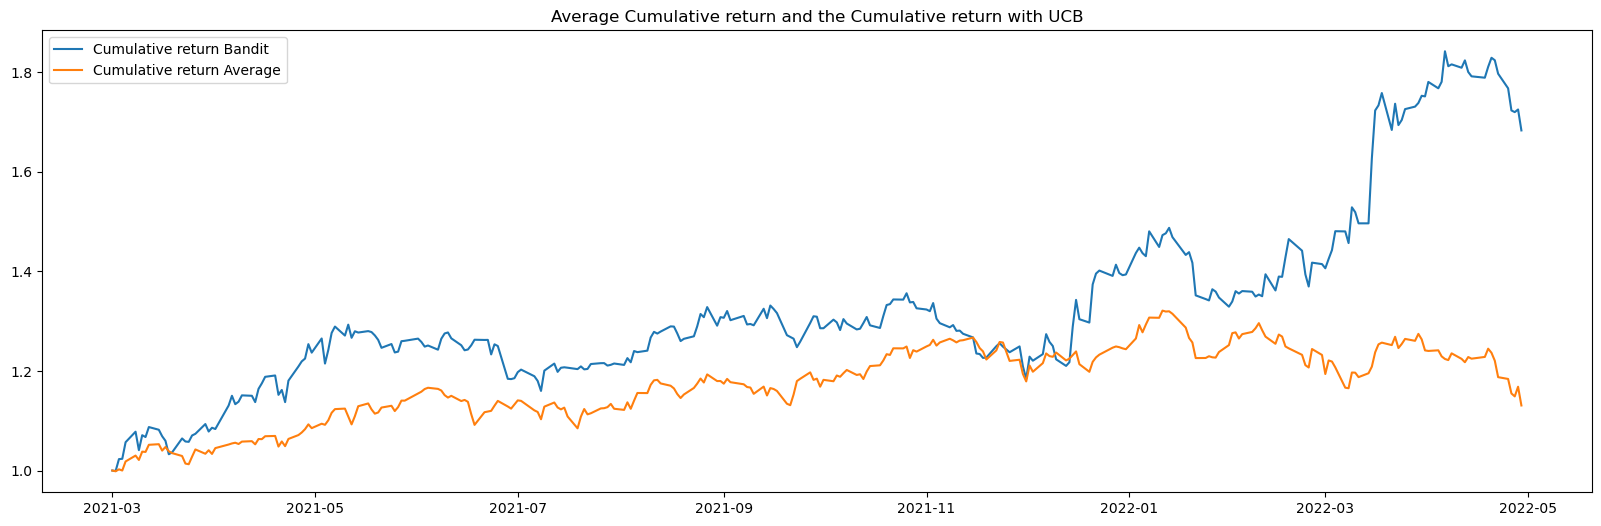

In [24]:
plt.figure(figsize=(20,6))

return_cumulative = np.zeros((TMAX+1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
legend = plt.legend()
plt.title("Average Cumulative return and the Cumulative return with UCB")
plt.show()

In [25]:
np.random.seed(42)

# Parameters
NK = pdata.shape[1]
EPSILON = 0.15 # Epsilon for Epsilon Greedy policy
ALPHA = 0.8
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

reward_avg, optimal_avg = bandit_problem_epsilon_greedy(pdata, EPSILON, ALPHA, NEPISODES, HOLD)

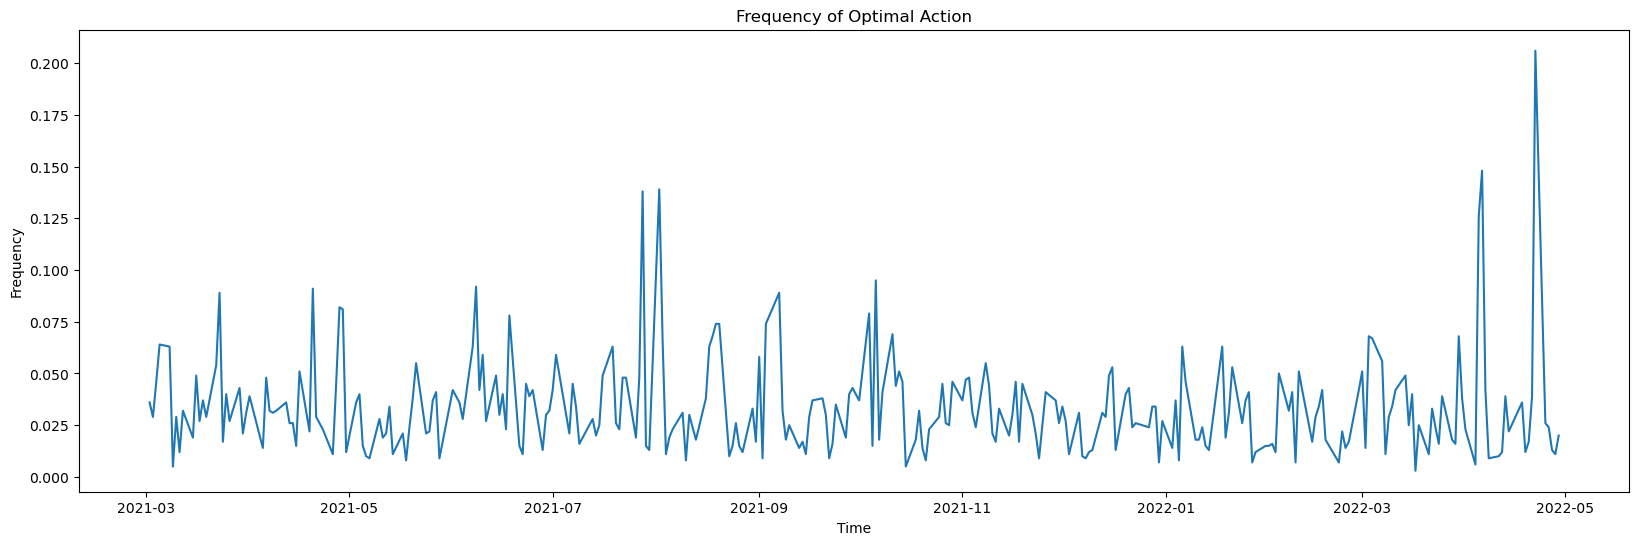

In [26]:
plt.figure(figsize=(20, 6))
plt.plot(pdata_dates[HOLD:pdata.shape[0]], optimal_avg)
plt.title("Frequency of Optimal Action")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

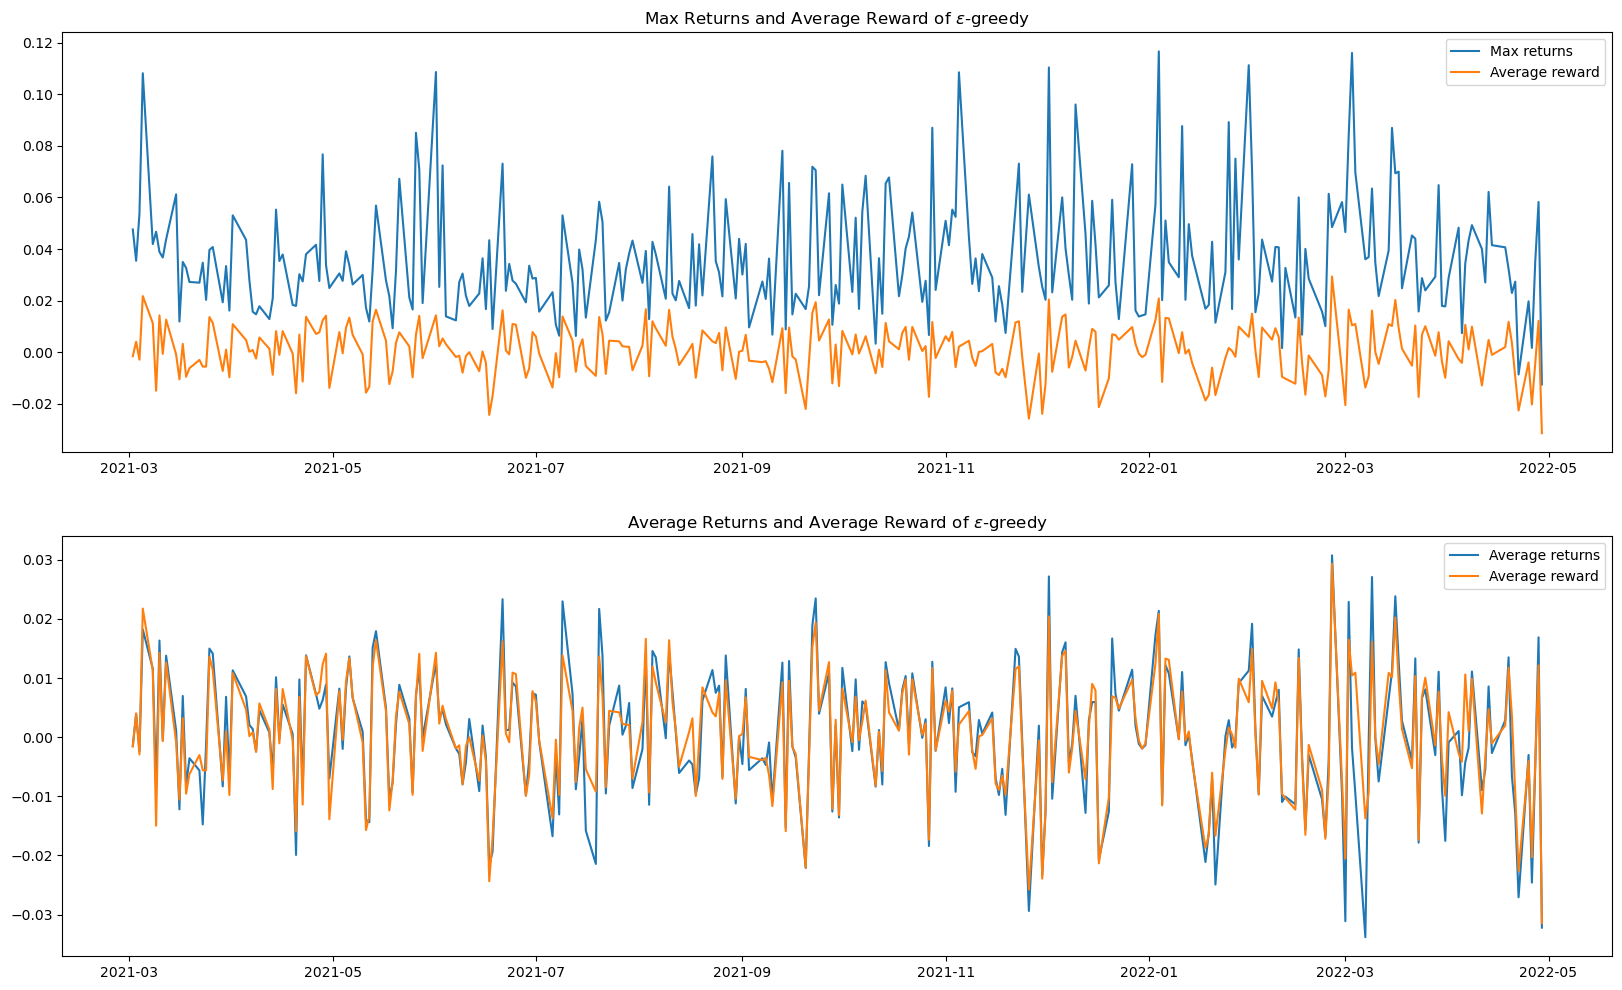

Average Frequency of Optimal Action: 3.38%
Average Annualized Return (Equally-Weighted Portfolio): 12.71%
Annualized Volatility (Equally-Weighted Portfolio): 31.10%
Average Annualized Return (e-greedy Portfolio): 14.50%
Annualized Volatility (e-greedy Portfolio): 15.46%


In [27]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 12))

# First plot
axs[0].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.max((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Max returns",
)
axs[0].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[0].legend()
axs[0].set_title("Max Returns and Average Reward of $\epsilon$-greedy")

# Second plot
axs[1].plot(
    pdata_dates[HOLD:pdata.shape[0]],
    np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1),
    label="Average returns",
)
axs[1].plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label="Average reward")
axs[1].legend()
axs[1].set_title("Average Returns and Average Reward of $\epsilon$-greedy")

plt.show()

# average frequency of optimal action
optimal_avg_mean = np.mean(optimal_avg)
print("Average Frequency of Optimal Action: {:.2%}".format(optimal_avg_mean))

# average annualized return from holding the equally-weighted portfolio
equally_weighted_avg_return = np.mean((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
equally_weighted_annualized_return = (1 + equally_weighted_avg_return) ** (250 / HOLD) - 1
equally_weighted_annualized_volatility = np.sqrt(250 / HOLD) * np.std((pdata[HOLD:pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :])
print("Average Annualized Return (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_return))
print("Annualized Volatility (Equally-Weighted Portfolio): {:.2%}".format(equally_weighted_annualized_volatility))

# average annualized return from holding the Bandit portfolio
egreedy_avg_return = np.mean(reward_avg)
egreedy_annualized_return = (1 + egreedy_avg_return) ** (250 / HOLD) - 1
egreedy_annualized_volatility = np.sqrt(250 / HOLD) * np.std(reward_avg)
print("Average Annualized Return (e-greedy Portfolio): {:.2%}".format(egreedy_annualized_return))
print("Annualized Volatility (e-greedy Portfolio): {:.2%}".format(egreedy_annualized_volatility))

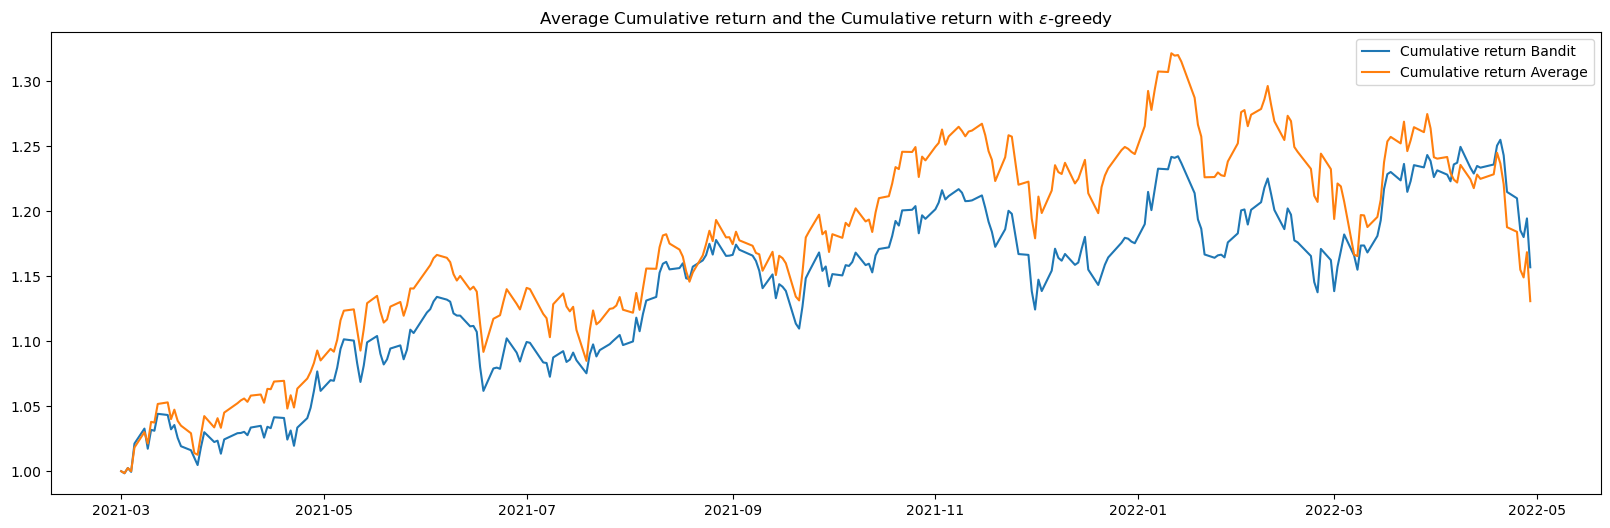

In [28]:
plt.figure(figsize=(20,6))

return_cumulative = np.zeros((TMAX+1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean((pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :])
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    pdata_dates[HOLD - 1:pdata.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
legend = plt.legend()
plt.title("Average Cumulative return and the Cumulative return with $\epsilon$-greedy")
plt.show()

#### Results

**Average Frequency of Optimal Action:**

The UCB algorithm demonstrates a higher average frequency of optimal action at 5.42% compared to the $\epsilon$-greedy algorithm's 3.38%. This suggests that the UCB algorithm has a better ability to identify and exploit optimal investment opportunities.

**Average Annualized Return:**

The equally-weighted portfolio achieves an average annualized return of 12.71%, while the UCB portfolio surpasses this with an impressive average annualized return of 61.45%. The $\epsilon$-greedy algorithm also outperforms the equally-weighted portfolio, with an average annualized return of 14.48%. These results indicate that both UCB and $\epsilon$-greedy algorithms are effective in generating higher returns compared to a passive equally-weighted approach.

**Annualized Volatility:**

The annualized volatility of the UCB portfolio stands at 27.59%, which is lower than that of the equally-weighted portfolio (31.10%). This implies that the UCB algorithm achieves a better risk-adjusted performance. The $\epsilon$-greedy portfolio exhibits the lowest volatility at 15.46%, suggesting a more stable investment strategy but potentially at the cost of higher returns.

As discussed earlier, a dataset on a wider timeframe and less uncertain periods produce better performance using both the algorithms than that of an equally weighted portfolio.